## Analiza dokładności i czasu uczenia dla Big Data - porównanie metody gradientu prostego, metody gradientu stochastycznego i zmniejszenia zbioru uczącego.

Imię, nazwisko: Krzysztof Jarek.

Kierunek, semestr: IT II, 2.

Data oddania: 24.01.2023.


## Cele:

* implementacja algorytmów realizujących metody Gradient Descent i Stochastic Gradient Descent,
* wykorzystanie pierwszego algorytmu dla zagadnienia *undersamplingu*,
* przeprowadzenie analizy porównawczej działania implementacji ze względu na czas wykonania i dokładność.

Podjęty problemem polega na tym by można było rozpoznawać kształty okręgów na obrazach. W tym celu w ramach projektu uwaga została zwrócona na transformatę Hough'a- czy też pewne rozwiązanie korzystające z niej- dedykowaną dla przypadku rozpoznawania kształtów kolistych.

Zanim jednak przystąpi się do implementacji samej transformaty, najpierw należy zbudować konieczne narzędzie do odpowiedniej obróbki zdjęć tak by mogły się nadawać do dalszej, właściwej analizy.

## Przebieg badania:

### Wykorzystany oprogramowanie, sprzęt:
* MacOs 10.15 Catalina,
* środowisko: Jupyter Notebook,
* procesor: 2,7 GHz Dwurdzeniowy procesor Intel Core i5,
* pamięć: 8 GB 1867 MHz DDR3.

### Prezentacja zbioru i danych w nim zawartych:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics

plt.style.use('seaborn')
WEIGHT, HEIGHT = 7, 10

In [2]:
spam_df = pd.read_csv('data/spam.data', header=None, sep=' ')

In [3]:
print( 'Rozmiar zbioru:', spam_df.shape )

Rozmiar zbioru: (4601, 58)


In [4]:
spam_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [5]:
spam_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [6]:
X = spam_df.iloc[:, :-1].values
y = spam_df.iloc[:, -1].values

In [7]:
print( 'Rozmiar zbiorów X i y:', X.shape, 'i', y.shape, '.' )
print( 'Typ danych dla zbiorów X i y:', X.dtype, 'i', y.dtype, '.' )

Rozmiar zbiorów X i y: (4601, 57) i (4601,) .
Typ danych dla zbiorów X i y: float64 i int64 .


In [8]:
X_norm = np.copy(X)
X_mean, X_std = X_norm.mean(), X_norm.std()
X_norm = ( X_norm - X_mean ) / X_std

### Przygotowane funkcje:

In [9]:
# https://stackoverflow.com/a/29863846
def sigmoid(z):  
    return np.exp(-np.logaddexp(1e-16, -z))

In [10]:
def CostFunction(X, y, theta):
    
    m = y.shape[0];
    z = np.dot(theta, X.T)
    h_theta = sigmoid(z)
    
    # cost for given theta parameters and computed gradient
    J  = - ( y.T.dot( np.log(h_theta) ) + (1 - y).T.dot( np.log(1-h_theta) ) ) /m
    dJ = (h_theta - y).T.dot(X) /m
    
    return J, dJ

In [11]:
def predict(X, theta):
    z = np.dot(theta, X.T)
    h_theta = sigmoid(z)
    return np.where(h_theta >= 0.5, 1, 0)

In [12]:
def get_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_true.shape[0]

In [13]:
def plot_confusion_matrix(y_test, predicts, acc):
    print('Tablica pomyłek dla metody:')
    cm = metrics.confusion_matrix(y_test, predicts)
    sn.heatmap(cm, annot=True, cmap="crest")
    plt.ylabel('Aktualne klasy', size=15)
    plt.xlabel('Predykowane klasy', size=15)
    plt.title(f'Accuracy: {acc*100:.2f}%', size=15)
    plt.rcParams["figure.figsize"] = HEIGHT, WEIGHT
    plt.show()

### Gradient Descent:

In [14]:
def GradientDescent( X, y, in_theta, alpha=0.1, num_iter=50 ):
    theta = in_theta.copy()
    
    for _ in range(num_iter):
        J, dJ = CostFunction(X, y, theta)
        theta = theta - alpha * dJ
    
    return theta, J

In [15]:
ALPHA = 0.01
NUM_ITER = 500
STOCH_FRACTION = 0.33
SAMPLING_FRACTION = 0.5

In [16]:
m, n  = X_norm.shape
theta = np.random.rand(n)

In [17]:
time_GD = %timeit -r 3 -n 10 -o GradientDescent(X_norm, y, theta, ALPHA, NUM_ITER)

268 ms ± 20.5 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [18]:
thetaOpt, JOpt = GradientDescent(X_norm, y, theta, ALPHA, NUM_ITER)

In [19]:
print( 'Znalezione minimum:', JOpt )

Znalezione minimum: 0.6293062047106095


In [20]:
y_pred_GD = predict(X_norm, thetaOpt)

In [21]:
accuracy_GD = get_accuracy(y, y_pred_GD)
print( f'Policzona accuracy (dokładność): {accuracy_GD:.6f}' )

Policzona accuracy (dokładność): 0.665942


Tablica pomyłek dla metody:


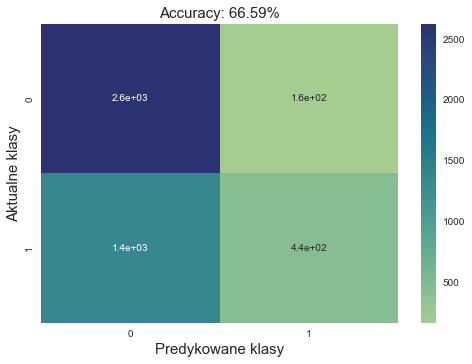

In [22]:
plot_confusion_matrix(y, y_pred_GD, accuracy_GD)

### Stochastic Gradient Descent:

In [23]:
def StochasticGradientDescent( X, y, in_theta, alpha=0.1, num_iter=50, stoch_fraction=0.5 ):
    theta = in_theta.copy()
    X_len = X.shape[0]
    num_of_samples = int( X_len*stoch_fraction )
    
    for _ in range(num_iter):
        idx = np.random.choice( X_len, size=num_of_samples, replace=False )
        J, dJ = CostFunction( X[idx,:], y[idx], theta )
        theta = theta - alpha * dJ
    
    return theta, J

In [24]:
time_SGD = %timeit -r 3 -n 10 -o StochasticGradientDescent(X_norm, y, theta, ALPHA, NUM_ITER, STOCH_FRACTION)

521 ms ± 30.9 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [25]:
thetaOptSGD, JOptSGD = StochasticGradientDescent(X_norm, y, theta, ALPHA, NUM_ITER, STOCH_FRACTION)

In [26]:
print( 'Znalezione minimum:', JOptSGD )

Znalezione minimum: 0.6258450322898864


In [27]:
y_pred_SGD = predict(X_norm, thetaOptSGD)

In [28]:
accuracy_SGD = get_accuracy(y, y_pred_SGD)
print( f'Policzona accuracy (dokładność): {accuracy_SGD:.6f}' )

Policzona accuracy (dokładność): 0.665942


Tablica pomyłek dla metody:


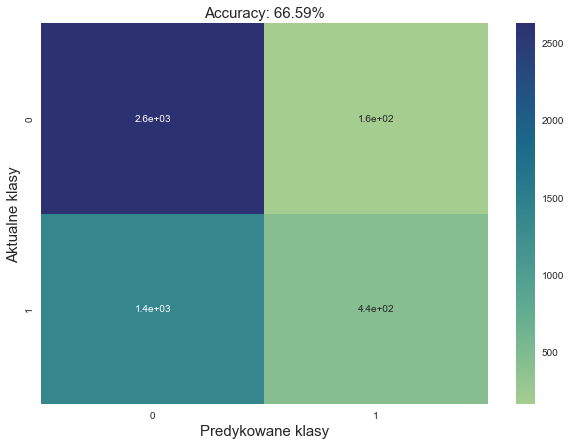

In [29]:
plot_confusion_matrix(y, y_pred_SGD, accuracy_SGD)

### Zastosowanie sampling'u:

In [30]:
NUM_SAMPLES = int( m*SAMPLING_FRACTION )
idx_sampled = np.random.choice( m, size=NUM_SAMPLES, replace=False )

# check that each item occurs only once
print( "Czy próbki w nowym zbiorze powtarzają się:", ( np.bincount(idx_sampled.ravel()) == 1 ).all() )

Czy próbki w nowym zbiorze powtarzają się: False


In [31]:
X_sampled, y_sampled = X_norm[idx_sampled,:], y[idx_sampled]

In [32]:
time_Sampl = %timeit -r 3 -n 10 -o GradientDescent(X_sampled, y_sampled, theta, ALPHA, NUM_ITER)

114 ms ± 3.84 ms per loop (mean ± std. dev. of 3 runs, 10 loops each)


In [33]:
thetaOptSampl, JOptSampl = GradientDescent(X_sampled, y_sampled, theta, ALPHA, NUM_ITER)

In [34]:
print( 'Znalezione minimum:', JOptSampl )

Znalezione minimum: 0.6329956188108654


In [35]:
y_pred_Sampl = predict(X_norm, thetaOptSampl)

In [36]:
accuracy_Sampl = get_accuracy(y, y_pred_Sampl)
print( f'Policzona accuracy (dokładność): {accuracy_Sampl:.6f}' )

Policzona accuracy (dokładność): 0.667246


Tablica pomyłek dla metody:


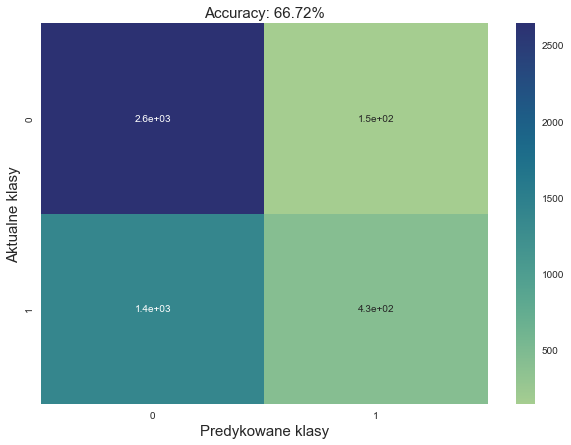

In [37]:
plot_confusion_matrix(y, y_pred_Sampl, accuracy_Sampl)

### Analiza przeprowadzonych symulacji:

In [38]:
def AnalyzeGradientDescent( X, y, in_theta, alpha=0.1, num_iter=50 ):
    theta = in_theta.copy()
    
    J_list = []
    theta_list = []
    
    for _ in range(num_iter):
        J, dJ = CostFunction(X, y, theta)
        theta = theta - alpha * dJ
        J_list.append(J)
        theta_list.append(theta)
        
    return np.array(theta_list), np.array(J_list)

In [39]:
def AnalyzeStochasticGradientDescent( X, y, in_theta, alpha=0.1, num_iter=50, stoch_fraction=0.5 ):
    theta = in_theta.copy()
    X_len = X.shape[0]
    num_of_samples = int( X_len*stoch_fraction )
    
    J_list = []
    theta_list = []
    
    for _ in range(num_iter):
        idx = np.random.choice( X_len, size=num_of_samples, replace=False )
        J, dJ = CostFunction( X[idx,:], y[idx], theta )
        theta = theta - alpha * dJ
        J_list.append(J)
        theta_list.append(theta)
        
    return np.array(theta_list), np.array(J_list)

In [40]:
def plot_cost_function(J_list, title):
    plt.plot(range(1, len(J_list) + 1), J_list)
    plt.xlabel('Liczba iteracji', size=15)
    plt.ylabel('Wartość kosztu', size=15)
    plt.title(title, size=15)
    plt.rcParams["figure.figsize"] = HEIGHT, WEIGHT
    plt.show()

In [41]:
thetaOpt_list, JOpt_list = AnalyzeGradientDescent(X_norm, y, theta, ALPHA, NUM_ITER)

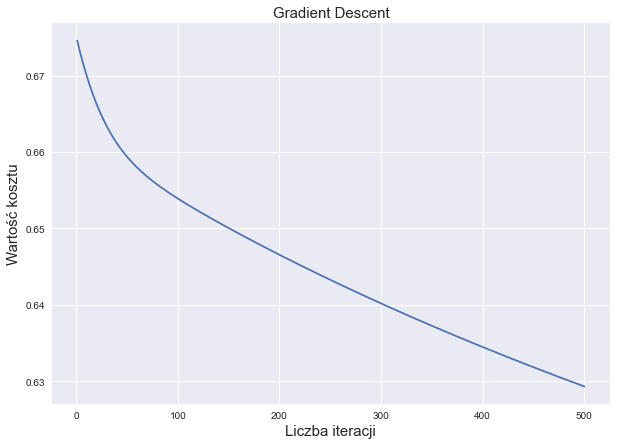

In [42]:
plot_cost_function(JOpt_list, 'Gradient Descent')

In [43]:
thetaOptSGD_list, JOptSGD_list = AnalyzeStochasticGradientDescent(
                            X_norm, y, theta, ALPHA, NUM_ITER, STOCH_FRACTION
                        )

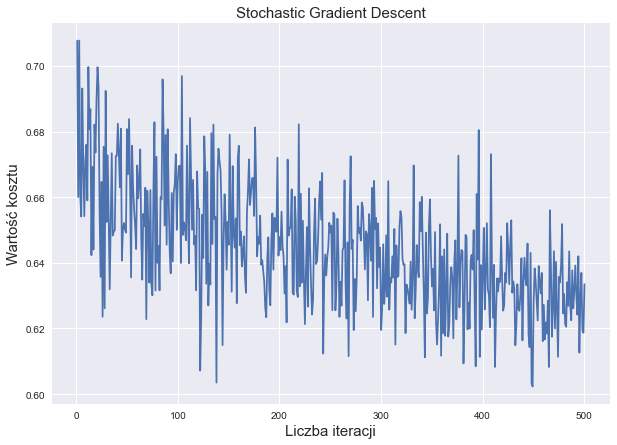

In [44]:
plot_cost_function(JOptSGD_list, 'Stochastic Gradient Descent')

In [45]:
thetaOptSampl_list, JOptSampl_list = AnalyzeGradientDescent(X_sampled, y_sampled, theta, ALPHA, NUM_ITER)

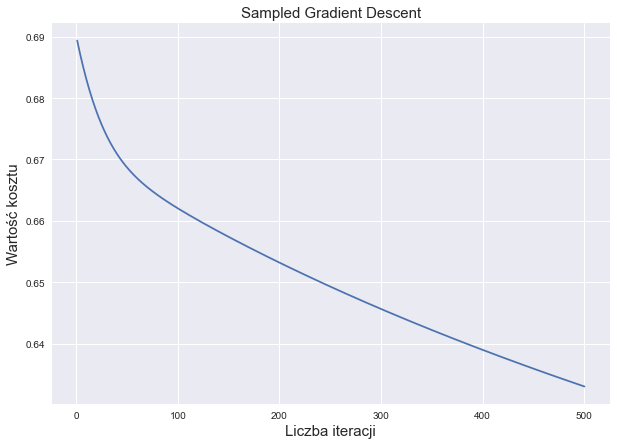

In [46]:
plot_cost_function(JOptSampl_list, 'Sampled Gradient Descent')

In [47]:
from sklearn.decomposition import PCA

In [78]:
def make_PCA(theta_list):
    pca = PCA(n_components=2)
    theta_pca = pca.fit_transform(theta_list)
    return theta_pca

In [82]:
thetaOpt_pca = make_PCA(thetaOpt_list)
thetaOptSGD_pca = make_PCA(thetaOptSGD_list)
thetaOptSampl_pca = make_PCA(thetaOptSampl_list)

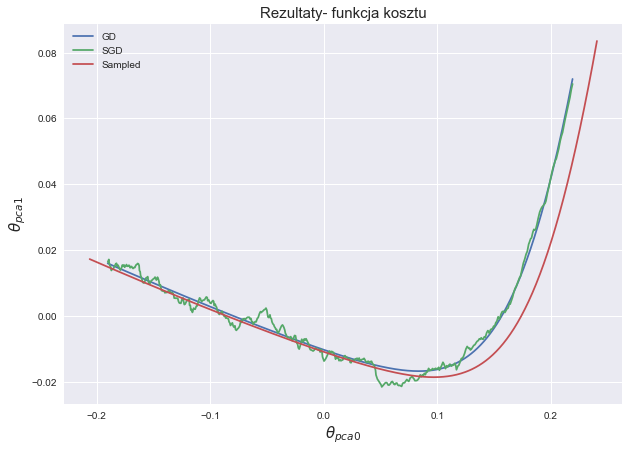

In [90]:
plt.plot(thetaOpt_pca[:,0], thetaOpt_pca[:,1], '-', label='GD')
plt.plot(thetaOptSGD_pca[:,0], thetaOptSGD_pca[:,1], '-', label='SGD')
plt.plot(thetaOptSampl_pca[:,0], thetaOptSampl_pca[:,1], '-', label='Sampled')
plt.title('Rezultaty- funkcja kosztu', size=15)
plt.xlabel('$\\theta_{pca0}$', size=15)
plt.ylabel('$\\theta_{pca1}$', size=15)
plt.rcParams["figure.figsize"] = HEIGHT, WEIGHT
plt.legend(loc='best')
plt.show()

In [ ]:
methods_names = ['GD', 'SGD', 'Sampled']

In [53]:
timings_GD = time_GD.timings[:]
timings_SGD = time_SGD.timings[:]
timings_Sampl = time_Sampl.timings[:]
timings = [timings_GD, timings_SGD, timings_Sampl]

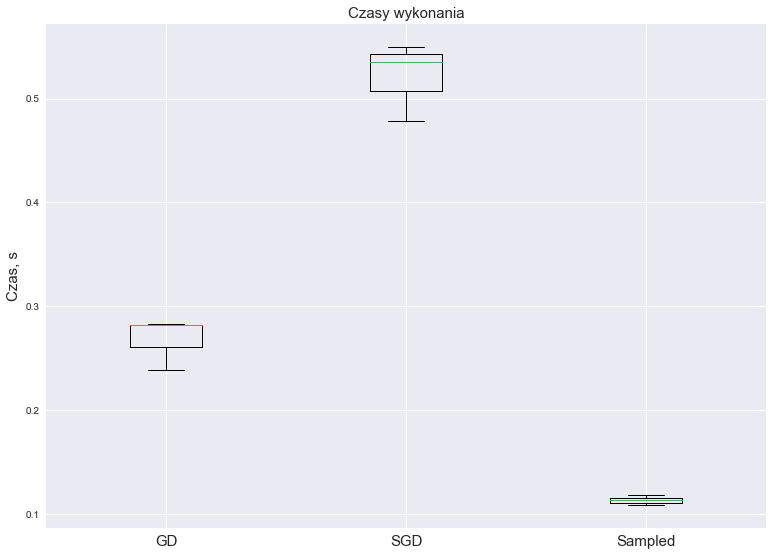

In [54]:
fig = plt.figure(figsize = (HEIGHT, WEIGHT))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(timings)
ax.set_title('Czasy wykonania', size=15)
ax.set_xticks([1, 2, 3], methods_names, size=15)
ax.set_ylabel('Czas, s', size=15)
plt.show()

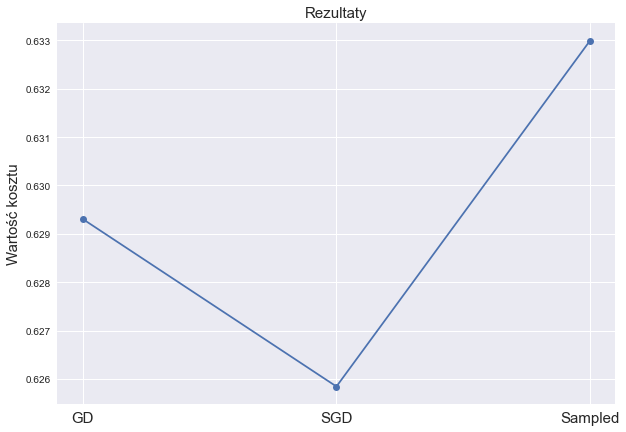

In [62]:
plt.plot([JOpt, JOptSGD, JOptSampl], '-o')
plt.title('Rezultaty', size=15)
plt.xticks([0, 1, 2], methods_names, size=15)
plt.ylabel('Wartość kosztu', size=15)
plt.rcParams["figure.figsize"] = HEIGHT, WEIGHT
plt.show()

## Wnioski:
* 
* 
* 
* 